In [88]:
import numpy as np
import matplotlib.pyplot as plt 

### Punto 1

Empecemos analizando la estabilidad del algoritmo Runge Kutta de tercer orden, comparemos la funcion exponencial utilizada en clase 

In [89]:
def f(y,x):
    
    return x + 2*y

def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.


def RungeKutta3P1(f,x,y0):
    h=x[1] - x[0]
    
    y=np.zeros_like(x)
    
    y[0]=y0
    
    k1=np.zeros(1)
    k2=np.zeros(1)
    
    R=np.zeros(1)
    
    for i in range(1,len(x)):
        
        R = np.array([y[i-1]])
        
        k1 = f(R,x[i-1])
        
        R = np.array([y[i-1]+0.5*h*k1[0]])
        
        k2 = f(R,x[i-1] + 0.5*h)
        
        R = np.array([y[i-1] -h*k1[0] + 2*h*k2])
        
        k3=f(R,x[i-1]+h)
        
        
        y[i] = y[i-1] + (h/6)*(k1[0] + 4*k2[0]+ k3[0])
        
    return y      

  

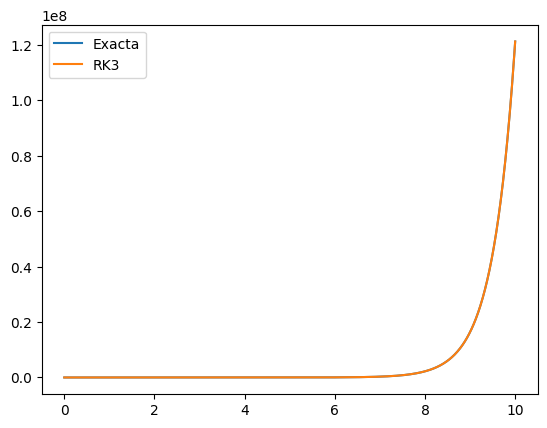

In [90]:
datos=np.linspace(0,10,1000)

solve_exacta = Solucion(datos)
y0=0

solve_RK3=RungeKutta3P1(f,datos,y0)

plt.plot(datos,solve_exacta,label='Exacta')
plt.plot(datos,solve_RK3,label='RK3')
plt.legend()


Ahora observemos el metodo de Runge Kutta 4

In [91]:
def RungeKutta4p1(f,t,y0):
    h = t[1] - t[0]
    
    
    y = np.zeros_like(t)
    y[0] = y0
    K1 = np.zeros(1)
    K2 = np.zeros(1)
    
    R = np.zeros(1)
    
    for i in range(1,len(t)):
        
            R = np.array([y[i-1]])
            
            K1 = f(R,t[i-1])
            
            R = np.array([y[i-1]+0.5*h*K1[0]])
            
            K2 = f(R,t[i-1]+0.5*h)
            
            R=np.array([y[i-1]+0.5*h*K2[0]])
            
            K3=f(R,t[i-1]+0.5*h)
            
            R=np.array([y[i-1]+h*K3[0]])
            
            K4=f(R,t[i-1]+h)
            
            y[i] = y[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
            
    return y

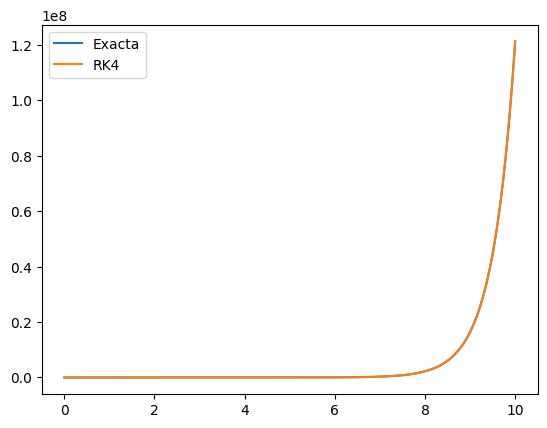

In [92]:

datos=np.linspace(0,10,1000)

solve_exacta = Solucion(datos)
y0=0

solve_RK4=RungeKutta4p1(f,datos,y0)

plt.plot(datos,solve_exacta,label='Exacta')
plt.plot(datos,solve_RK4,label='RK4')
plt.legend()

#### Análisis de los resultados

Claro, aquí tienes una versión revisada con algunas mejoras:

El análisis de los resultados revela la notable estabilidad de los algoritmos RK3 y RK4, especialmente considerando que se aplican a la aproximación de una función exponencial, una tarea que podría resultar desafiante para métodos numéricos menos robustos. La estabilidad se observa en la consistencia de los resultados, los cuales no oscilan alrededor de la función exacta, sino que muestran una tendencia clara hacia la convergencia con ella.

Estos resultados, que se mantendrán consistentes a lo largo de este taller, reflejan la confianza en la fiabilidad de los métodos de Runge-Kutta empleados. Aunque se reconoce que el método RK2 puede volverse inestable bajo ciertas condiciones, esta preocupación no se aplica a las siguientes funciones descritas por el metodo, ya que se observa una clara convergencia. Por lo tanto, si estas funciones resultan estables para RK2, lo será aún más para RK3 y RK4.



### Punto 3

In [93]:
def exactap3(x):
    y= (1/x**2) -(2/(x**2 + 2))
    return y

def system(y,x):
    dydx= x*y**2 - (2*y/x) - (1/x**3)
    return dydx

def rungekuttaP3(f,y0,x):
    h=x[1]-x[0]
    y=np.zeros_like(x)
    y[0]=y0
    k1=np.zeros(1)
    k2=np.zeros(1)
    
    R=np.zeros(1)
    
    for i in range(1,len(x)):
        R=np.array([y[i-1]])
        
        k1=f(R,x[i-1])
        
        R=np.array([y[i-1]+h*k1[0]])
        
        k2=f(R,x[i-1]+h)
        
        y[i]= y[i-1] + 0.5*h*(k1[0] + k2[0])
        
    return y

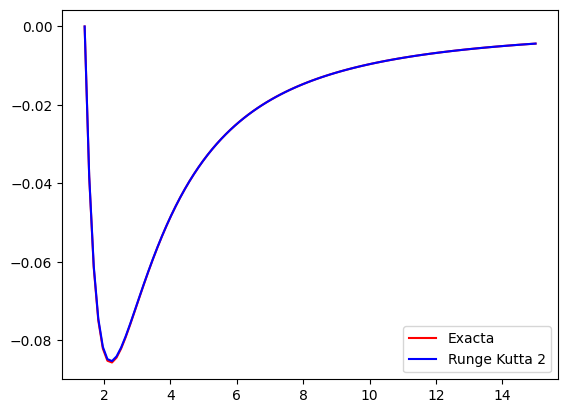

In [94]:
x=np.linspace(2**0.5,15,100)
y0=0

solucion= exactap3(x)

y=rungekuttaP3(system,y0,x)

plt.plot(x,solucion,color='r',label='Exacta')
plt.plot(x,y,color='b',label='Runge Kutta 2')

plt.legend()



Se puede observar que la ecuación y(x) obtenida por el método de Runge Kutta es bastanta parecida a la ecuación y(x) obtenida analíticamente.

### Punto 5

In [95]:
def derivada(r,t,q):
    
    dudt=r**q
    
    return dudt

def rungekutha2(f,r,t,q):
    h=t[1]-t[0]
    u=np.zeros_like(t)
    u[0]=r
    
    k1=np.zeros(1)
    k2=np.zeros(1)
    
    R=np.zeros(1)
    for i in range(1,len(t)):
        
        R=np.array([u[i-1]])
        k1=f(R,t[i-1],q)
        
        R=np.array([u[i-1]+h*k1[0]])
        k2=f(R,t[i-1]+h,q)
        
        u[i] = u[i-1] + 0.5*h*(k1[0]+k2[0])
        
    return u

def exactaqno1(t,q):
    
    u=(t*(1-q)+1)**(1/(1-q))
    
    return u

def exactaq1(t,q):
    u=np.e**t
    
    return u
    

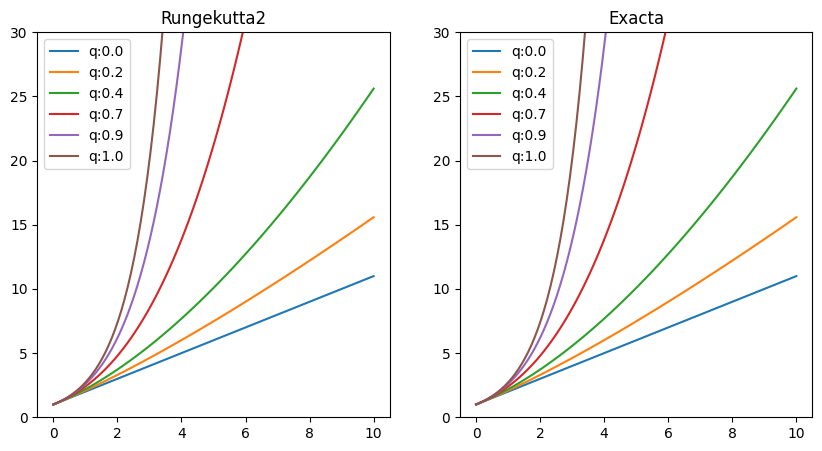

In [96]:
t=np.linspace(0,10,100)
q=[0.,0.2,0.4,0.7,0.9,1.]
r0=1

fig = plt.figure(figsize=(10,5))
ax1= fig.add_subplot(121)
ax2= fig.add_subplot(122)

ax1.set_ylim(0,30)
ax2.set_ylim(0,30)

ax1.set_title('Rungekutta2')
ax2.set_title('Exacta')

for i in range(len(q)):
    
    if i!= (len(q)-1):
        u=rungekutha2(derivada,r0,t,q[i])
        exacta=exactaqno1(t,q[i])
        
        ax1.plot(t,u,label=f'q:{q[i]}')
        ax2.plot(t,exacta,label=f'q:{q[i]}')
        
    else: 
        u=rungekutha2(derivada,r0,t,q[i])
        exacta=exactaq1(t,q[i])
        
        ax1.plot(t,u,label=f'q:{q[i]}')
        ax2.plot(t,exacta,label=f'q:{q[i]}')
        
ax1.legend()
ax2.legend()



Como se puede observar de las gráficas anteriores, el método de Runge Kutta 2 presento una gran precisión al momento de encontrar los valores de U(t) para los distintos q